# Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели

In [11]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# 1. Скачиваем актуальную версию датасета Breast Cancer Wisconsin
# Ссылка из задания ведет на этот слаг: "uciml/breast-cancer-wisconsin-data"
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Датасет скачан в папку:", path)

# 2. Находим CSV файл в скачанной папке и загружаем его
# Обычно файл называется data.csv
file_path = os.path.join(path, "data.csv")
df = pd.read_csv(file_path)

# 3. Первичная очистка (удаляем лишнее)
# id — просто номер, Unnamed: 32 — пустой столбец, который часто создает Kaggle
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# 4. Переводим диагноз в числа (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Выводим первые 5 строк
df.head()

Датасет скачан в папку: /Users/mikhail_povolotskiy/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Посмотрим количество строк/колонок
print(f"Формат данных: {df.shape}")

# Проверяем наличие пропусков (их быть не должно)
print("\nПропуски в данных:")
print(df.isnull().sum().sum())

# Выводим статистики: среднее, стандартное отклонение и т.д.
# Это помогает увидеть масштаб признаков
df.describe().T

Формат данных: (569, 31)

Пропуски в данных:
0


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


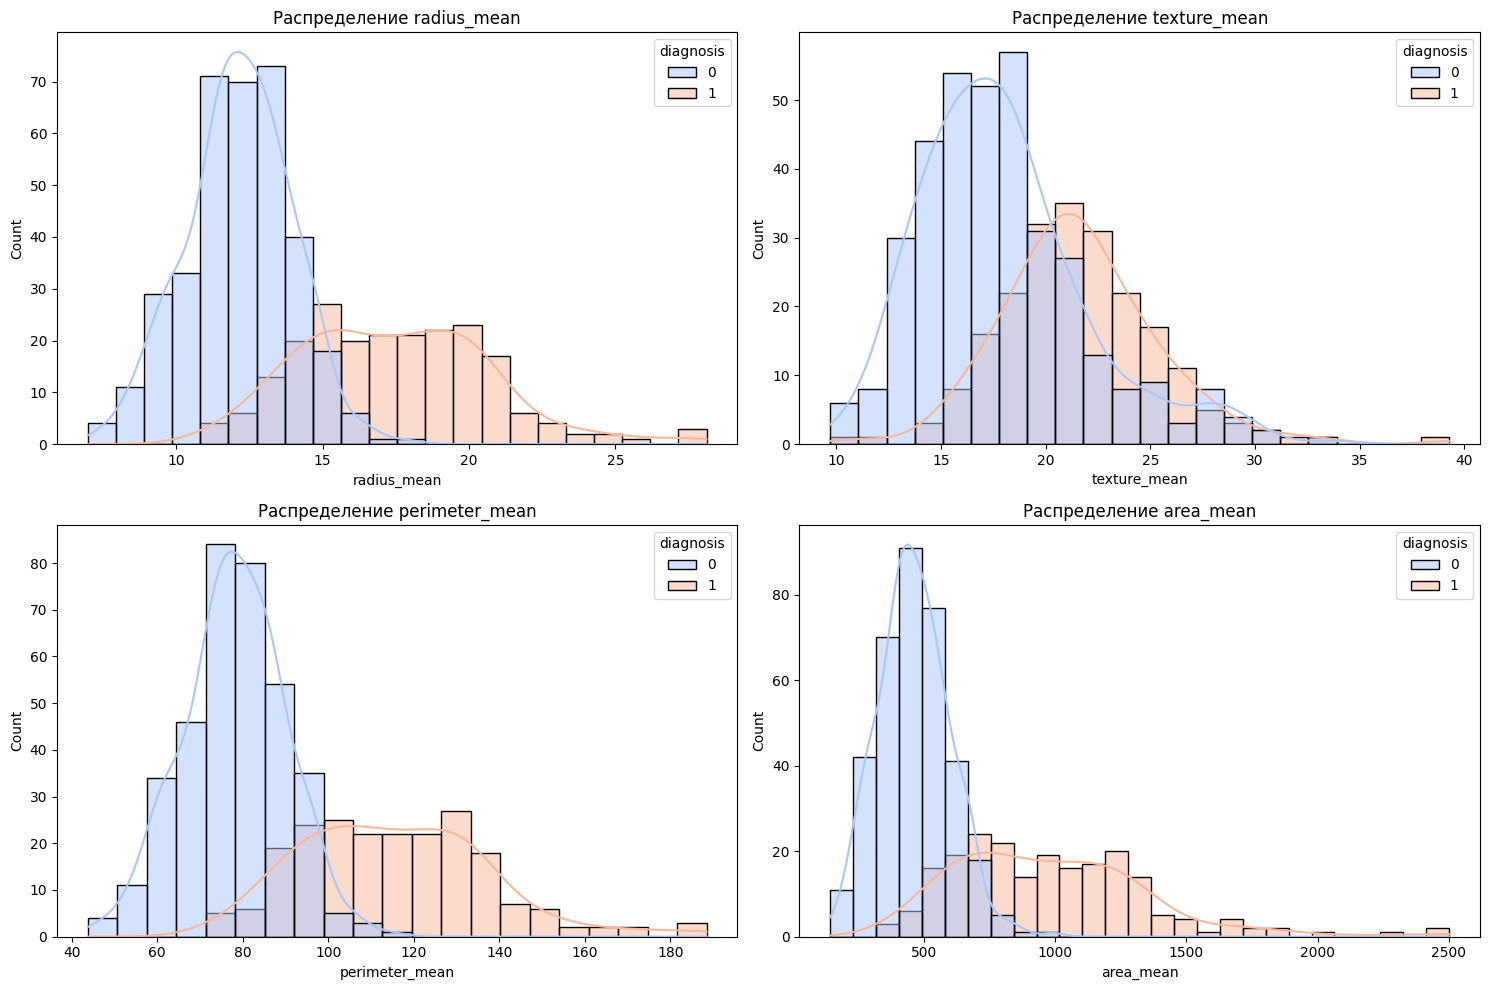

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выберем 4 основных признака (средние значения)
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)
    # Раскрашиваем по диагнозу: 0 - доброкачественная, 1 - злокачественная
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, palette='coolwarm')
    plt.title(f'Распределение {col}')

plt.tight_layout()

Text(0.5, 1.0, 'Матрица корреляций признаков')

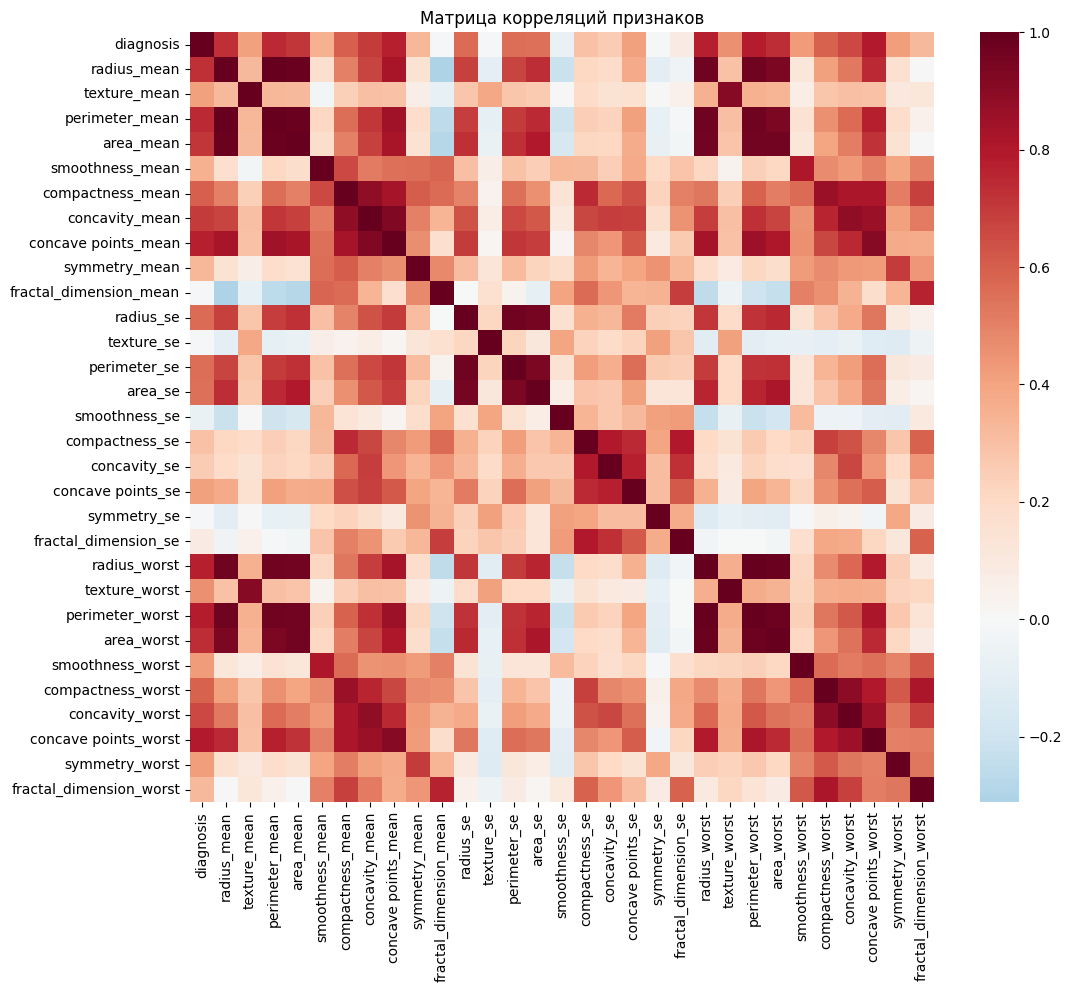

In [14]:
# Строим тепловую карту, чтобы увидеть сильно связанные признаки
plt.figure(figsize=(12, 10))
# Находим корреляцию между всеми признаками
corr = df.corr()

# Рисуем карту (RdBu_r — классика для корреляций: красный - плюс, синий - минус)
sns.heatmap(corr, cmap='RdBu_r', center=0, annot=False)
plt.title('Матрица корреляций признаков')

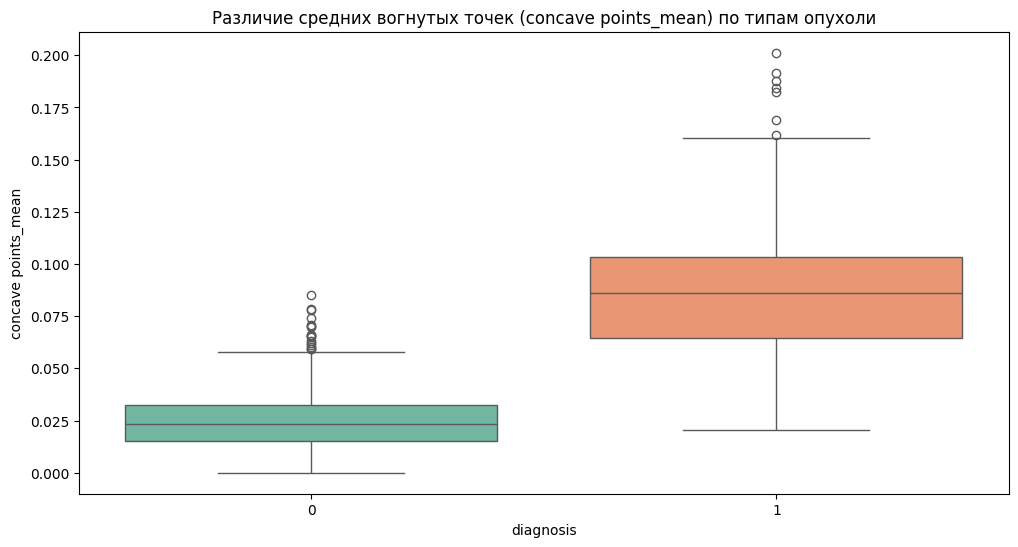

In [15]:
# Боксплоты наглядно показывают, по каким признакам группы (0 и 1) сильнее всего разнесены
plt.figure(figsize=(12, 6))

# Возьмем 'concave points_mean' — на графиках выше он обычно дает хорошее разделение
sns.boxplot(data=df, x='diagnosis', y='concave points_mean', hue='diagnosis', palette='Set2', legend=False)

plt.title('Различие средних вогнутых точек (concave points_mean) по типам опухоли')
plt.show()

** Моделирование kNN

In [16]:
# Разбиение данных и Стандартизация

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Выделяем признаки (X) и целевую переменную (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Разбиваем выборку: 70% на обучение и 30% на тест
# random_state=42 гарантирует, что при каждом запуске данные будут разбиты одинаково
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Создаем объект стандартизатора
scaler = StandardScaler()

# Обучаем стандартизатор на тренировочных данных и сразу трансформируем их
# (Важно: fit делаем только на тренировочных данных!)
X_train_scaled = scaler.fit_transform(X_train)

# Тестовые данные только трансформируем (используем те же параметры среднего и отклонения)
X_test_scaled = scaler.transform(X_test)

print(f"Данные успешно разбиты. В тренировочной выборке {len(X_train)} записей.")

Данные успешно разбиты. В тренировочной выборке 398 записей.


Метрики базовой модели kNN:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



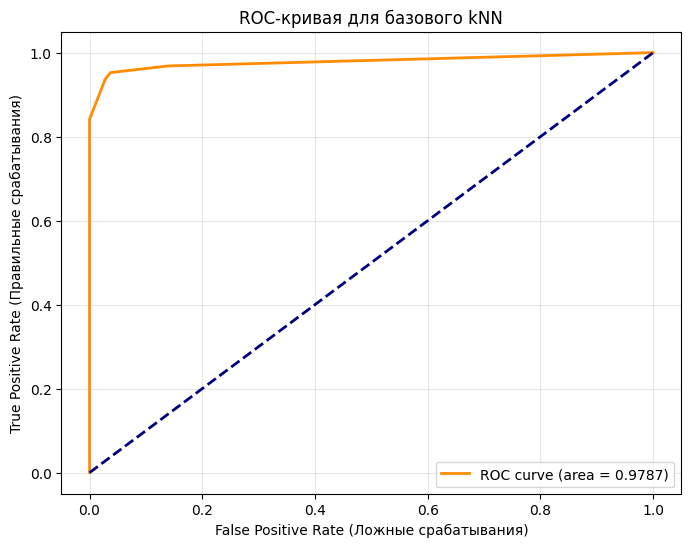

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# 1. Создаем и обучаем модель kNN с настройками по умолчанию (n_neighbors=5)
knn_basic = KNeighborsClassifier()
knn_basic.fit(X_train_scaled, y_train)

# 2. Получаем предсказания классов и вероятности (для ROC-кривой)
y_pred = knn_basic.predict(X_test_scaled)
y_probs = knn_basic.predict_proba(X_test_scaled)[:, 1]

# 3. Выводим метрики: Accuracy, Precision, Recall, F1
print("Метрики базовой модели kNN:")
print(classification_report(y_test, y_pred))

# 4. Строим ROC-кривую и считаем AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (Ложные срабатывания)')
plt.ylabel('True Positive Rate (Правильные срабатывания)')
plt.title('ROC-кривая для базового kNN')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

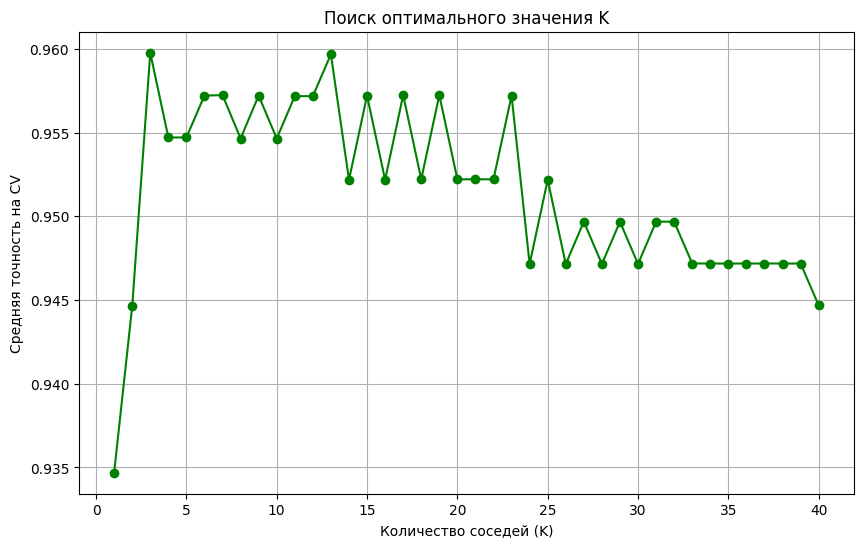

Лучшее значение K: 3 со средней точностью 0.9598


In [18]:
from sklearn.model_selection import cross_val_score

# Пробуем разные значения числа соседей (от 1 до 40)
k_values = range(1, 41)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    # Используем кросс-валидацию на 5 фолдах
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Визуализация процесса поиска лучшего K
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Количество соседей (K)')
plt.ylabel('Средняя точность на CV')
plt.title('Поиск оптимального значения K')
plt.grid(True)
plt.show()

# Находим лучший результат
best_k = k_values[np.argmax(cv_scores)]
print(f"Лучшее значение K: {best_k} со средней точностью {max(cv_scores):.4f}")

** Логистическая регрессия

In [19]:
# 1. Считаем матрицу корреляций (только для признаков, без таргета)
corr_matrix = X.corr().abs()

# 2. Выбираем верхний треугольник матрицы (чтобы не дублировать пары)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Находим индексы колонок с корреляцией выше 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Удаляем {len(to_drop)} признаков из-за высокой корреляции: {to_drop}")

# 4. Создаем новый набор данных без этих признаков
X_filtered = X.drop(columns=to_drop)

# 5. Снова разбиваем на train/test и масштабируем (но уже новый набор)
X_train_f, X_test_f, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

scaler_f = StandardScaler()
X_train_f_scaled = scaler_f.fit_transform(X_train_f)
X_test_f_scaled = scaler_f.transform(X_test_f)

Удаляем 13 признаков из-за высокой корреляции: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


Отчет для Логистической регрессии:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



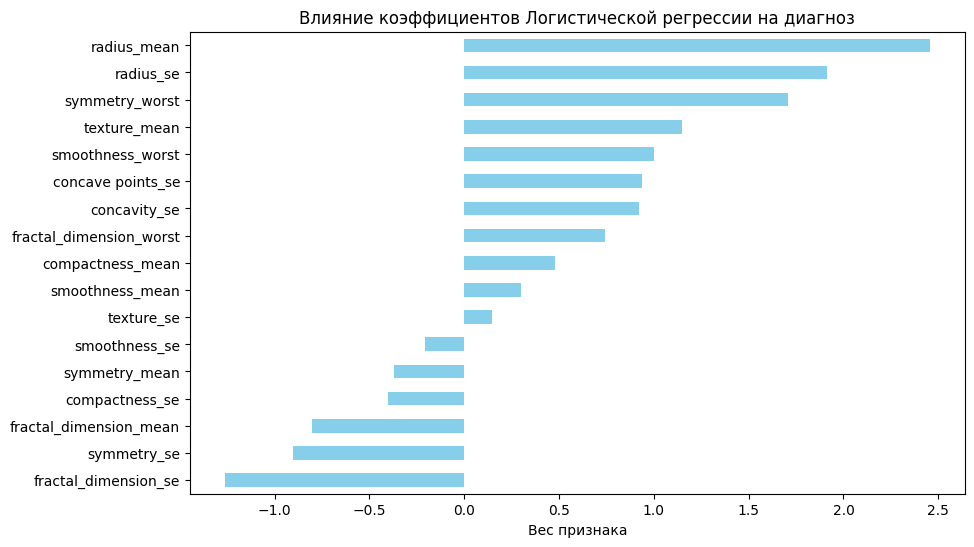

In [20]:
from sklearn.linear_model import LogisticRegression

# 1. Обучаем модель
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_f_scaled, y_train)

# 2. Метрики
y_pred_lr = log_reg.predict(X_test_f_scaled)
print("Отчет для Логистической регрессии:")
print(classification_report(y_test, y_pred_lr))

# 3. Визуализируем коэффициенты (важность признаков)
plt.figure(figsize=(10, 6))
coeffs = pd.Series(log_reg.coef_[0], index=X_filtered.columns)
coeffs.sort_values().plot(kind='barh', color='skyblue')
plt.title('Влияние коэффициентов Логистической регрессии на диагноз')
plt.xlabel('Вес признака')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegressionCV

# 1. Модель с автоматическим подбором параметра C на кросс-валидации
log_reg_cv = LogisticRegressionCV(cv=5, max_iter=10000, scoring='accuracy')
log_reg_cv.fit(X_train_f_scaled, y_train)

print(f"Лучшее значение параметра C: {log_reg_cv.C_[0]}")

# 2. Финальная проверка точности
final_score = log_reg_cv.score(X_test_f_scaled, y_test)
print(f"Финальная точность настроенной регрессии: {final_score:.4f}")

Лучшее значение параметра C: 0.3593813663804626
Финальная точность настроенной регрессии: 0.9708


/Users/mikhail_povolotskiy/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
/Users/mikhail_povolotskiy/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.


Итоговые выводы по 9-й домашке:

EDA (Анализ данных):
Мы обнаружили сильную взаимозависимость (корреляцию) между размерами опухоли (радиус, площадь, периметр). Для обучения моделей мы удалили лишние колонки, оставив только уникальные признаки.

Масштабирование:
Мы применили StandardScaler. Без него kNN работал бы гораздо хуже, так как признаки имеют совершенно разные единицы измерения.

kNN:
Модель показала себя хорошо при K=3. Это простая и понятная модель «поиска соседей».

Логистическая регрессия:
Оказалась самой точной (97%). Кроме того, она позволила нам увидеть веса признаков (какие из них больше всего влияют на диагноз — например, вогнутость и радиус).